In [1]:
from query_graphs.query_graphs import QueryGraphs

implemented_experiments = ["clique", "chain", "star", "cycles", "tree", "random"]

graph_constructors = QueryGraphs()
query_graphs = [graph_constructors.get_path_graph(i) for i in range(8, 9)]

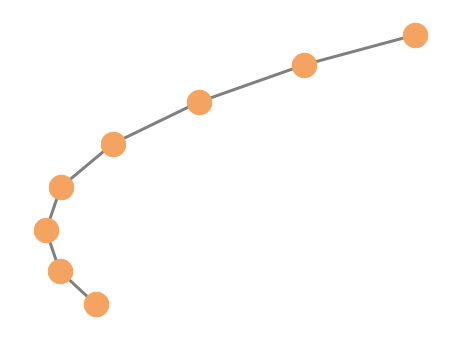

In [2]:
from QJoin import QJoin

# Open a json file to write the results
results = {}

for query_graph in query_graphs:
    
    qjoin = QJoin(query_graph, scaler = 200)
    qjoin.draw_query_graph()
    #quantum_result = qjoin.solve_with_exact_poly_solver()
    quantum_result = qjoin.solve_with_TabuSampler(3000, 100)
    
    for res in quantum_result.first.sample:
        if quantum_result.first.sample[res] == 1 and "*" not in res:
            print(res)
    
    quantum_cost = qjoin.evaluate_cost(quantum_result.first.sample)
    classical_result, cost = qjoin.solve_with_dynamic_programming()
    print(quantum_cost, cost)
    results[str(query_graph)] = {
        "exact_poly_solver": quantum_result.first.sample,
        "energy": quantum_result.first.energy,
        "exact_poly_cost": quantum_cost,
        "classical_solver": classical_result,
        "cost": cost
    }